# **IMPORTADO DE MÓDULOS**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from functions import (Calculate_CFD, create_position, plot_gaussian, get_gaussian_params,
                       calculate_gaussian_center_sigma, calculate_slope_y_intercept)

In [3]:
# Load data 
non_normalized_dir = '/home/josea/DEEP_TIMING/DEEP_TIMING_VS/Na22_filtered_data/'
normalized_dir = '/home/josea/DEEP_TIMING/DEEP_TIMING_VS/Na22_filtered_data/'

non_normalized_data = np.load(os.path.join(non_normalized_dir,'pulsos_Na22_filt_norm_practica_polyfit_sin_normalizar.npz'))['data']
normalized_data = np.load(os.path.join(normalized_dir, 'Na22_test_val.npz'))['data']

In [4]:
fraction = 0.2    # Fraction to attenuate pulse for CFD
shift = 7        # Delay for CFD 
threshold = 0.02  # Threshold for relative Leading Edge
t_shift = 1     
nbins = 71
time_step = 0.2   # In ns

In [5]:
DATA_00 = normalized_data 
DATA_02 = create_position(DATA_00, channel_to_move = 1, channel_to_fix = 0, t_shift = t_shift)
DATA_20 = create_position(DATA_00, channel_to_move = 0, channel_to_fix = 1, t_shift = t_shift)
DATA_04 = create_position(DATA_00, channel_to_move = 1, channel_to_fix = 0, t_shift = int(2*t_shift))
DATA_40 = create_position(DATA_00, channel_to_move = 0, channel_to_fix = 1, t_shift = int(2*t_shift))

# **CFD**

In [6]:
timestamps_CFD_dec0_DATA_00 = Calculate_CFD(DATA_00[:, :, 0], fraction = fraction, shift = shift, time_step = time_step)
timestamps_CFD_dec1_DATA_00 = Calculate_CFD(DATA_00[:, :, 1], fraction = fraction, shift = shift, time_step = time_step)

timestamps_CFD_dec0_DATA_02 = Calculate_CFD(DATA_02[:, :, 0], fraction = fraction, shift = shift, time_step = time_step)
timestamps_CFD_dec1_DATA_02 = Calculate_CFD(DATA_02[:, :, 1], fraction = fraction, shift = shift, time_step = time_step)

timestamps_CFD_dec0_DATA_20 = Calculate_CFD(DATA_20[:, :, 0], fraction = fraction, shift = shift, time_step = time_step)
timestamps_CFD_dec1_DATA_20 = Calculate_CFD(DATA_20[:, :, 1], fraction = fraction, shift = shift, time_step = time_step)

timestamps_CFD_dec0_DATA_04 = Calculate_CFD(DATA_04[:, :, 0], fraction = fraction, shift = shift, time_step = time_step)
timestamps_CFD_dec1_DATA_04 = Calculate_CFD(DATA_04[:, :, 1], fraction = fraction, shift = shift, time_step = time_step)

timestamps_CFD_dec0_DATA_40 = Calculate_CFD(DATA_40[:, :, 0], fraction = fraction, shift = shift, time_step = time_step)
timestamps_CFD_dec1_DATA_40 = Calculate_CFD(DATA_40[:, :, 1], fraction = fraction, shift = shift, time_step = time_step)


TOF_CFD_V00 = timestamps_CFD_dec0_DATA_00 - timestamps_CFD_dec1_DATA_00
TOF_CFD_V02 = timestamps_CFD_dec0_DATA_02 - timestamps_CFD_dec1_DATA_02
TOF_CFD_V20 = timestamps_CFD_dec0_DATA_20 - timestamps_CFD_dec1_DATA_20
TOF_CFD_V04 = timestamps_CFD_dec0_DATA_04 - timestamps_CFD_dec1_DATA_04
TOF_CFD_V40 = timestamps_CFD_dec0_DATA_40 - timestamps_CFD_dec1_DATA_40

V40: CENTROID(ns) = 0.3998 +/- 0.00083  FWHM(ns) = 0.2149 +/- 0.00089
V20: CENTROID(ns) = 0.1995 +/- 0.00076  FWHM(ns) = 0.2153 +/- 0.00082
V00: CENTROID(ns) = -0.0004 +/- 0.00063  FWHM(ns) = 0.2140 +/- 0.00068
V02: CENTROID(ns) = -0.2004 +/- 0.00072  FWHM(ns) = 0.2141 +/- 0.00077
V04: CENTROID(ns) = -0.4004 +/- 0.00088  FWHM(ns) = 0.2141 +/- 0.00094



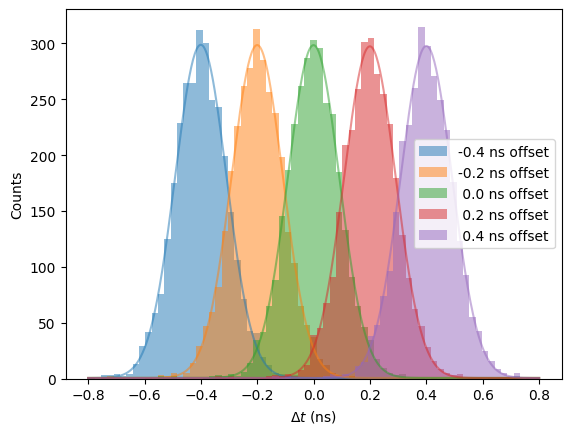

In [7]:
#------------------------------------------- Histogram and gaussian fit -----------------------------------------------
centroid_V00, sigmaN_V00 = calculate_gaussian_center_sigma(TOF_CFD_V00[None,:], np.zeros((TOF_CFD_V00.shape[0])), nbins = nbins) 

plot_gaussian(TOF_CFD_V04, centroid_V00, range = 0.8, label = '-0.4 ns offset', nbins = nbins)
plot_gaussian(TOF_CFD_V02, centroid_V00, range = 0.8, label = '-0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_CFD_V00, centroid_V00, range = 0.8, label = ' 0.0 ns offset', nbins = nbins)
plot_gaussian(TOF_CFD_V20, centroid_V00, range = 0.8, label = ' 0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_CFD_V40, centroid_V00, range = 0.8, label = ' 0.4 ns offset', nbins = nbins)

params_V04, errors_V04 = get_gaussian_params(TOF_CFD_V04, centroid_V00, range = 0.8, nbins = nbins)
params_V02, errors_V02 = get_gaussian_params(TOF_CFD_V02, centroid_V00, range = 0.8, nbins = nbins)
params_V00, errors_V00 = get_gaussian_params(TOF_CFD_V00, centroid_V00, range = 0.8, nbins = nbins)
params_V20, errors_V20 = get_gaussian_params(TOF_CFD_V20, centroid_V00, range = 0.8, nbins = nbins)
params_V40, errors_V40 = get_gaussian_params(TOF_CFD_V40, centroid_V00, range = 0.8, nbins = nbins)


print("V40: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V40[2], errors_V40[2], params_V40[3], errors_V40[3]))
print("V20: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V20[2], errors_V20[2], params_V20[3], errors_V20[3]))
print("V00: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V00[2], errors_V00[2], params_V00[3], errors_V00[3]))
print("V02: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V02[2], errors_V02[2], params_V02[3], errors_V02[3]))
print("V04: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V04[2], errors_V04[2], params_V04[3], errors_V04[3]))

print('')
plt.legend()
plt.xlabel('$\Delta t$ (ns)')
plt.ylabel('Counts')
plt.show()

In [8]:
# -------------------------------------------------------------------------
#--------------------------- BOOTSTRAPING ---------------------------------
# -------------------------------------------------------------------------

resolution_list = []
bias_list = []
MAE_list = []
for i in range(1000):
    a = np.random.choice(np.arange(0, TOF_CFD_V00.shape[0]), size = TOF_CFD_V00.shape[0], replace = True)
    
    centroid_V00, sigmaN_V00 = calculate_gaussian_center_sigma(TOF_CFD_V00[None,a], np.zeros((TOF_CFD_V00[a].shape[0])), nbins = nbins) 
    params_V04, errors_V04 = get_gaussian_params(TOF_CFD_V04[a], centroid_V00, range = 0.8, nbins = nbins)
    params_V02, errors_V02 = get_gaussian_params(TOF_CFD_V02[a], centroid_V00, range = 0.8, nbins = nbins)
    params_V00, errors_V00 = get_gaussian_params(TOF_CFD_V00[a], centroid_V00, range = 0.8, nbins = nbins)
    params_V20, errors_V20 = get_gaussian_params(TOF_CFD_V20[a], centroid_V00, range = 0.8, nbins = nbins)
    params_V40, errors_V40 = get_gaussian_params(TOF_CFD_V40[a], centroid_V00, range = 0.8, nbins = nbins)
    
    resolution = np.mean((params_V40[3], params_V20[3], params_V00[3], params_V02[3], params_V04[3]))
    resolution_list.append(resolution)
    
    bias = np.mean((params_V40[2], params_V20[2], params_V00[2], params_V02[2], params_V04[2]))
    bias_list.append(bias)

    error_V02 = abs((TOF_CFD_V02 - centroid_V00[:, np.newaxis] + time_step*t_shift))
    error_V00 = abs((TOF_CFD_V00 - centroid_V00[:, np.newaxis]))
    error_V20 = abs((TOF_CFD_V20 - centroid_V00[:, np.newaxis] - time_step*t_shift))
    error_V04 = abs((TOF_CFD_V04 - centroid_V00[:, np.newaxis] + 2*time_step*t_shift))
    error_V40 = abs((TOF_CFD_V40 - centroid_V00[:, np.newaxis] - 2*time_step*t_shift))

    Error = np.concatenate((error_V02, error_V00, error_V20, error_V04, error_V40), axis = 1)   
    MAE_list.append(np.mean(Error)) 

print('Mean CTR: ', np.mean(np.array(resolution_list))*1000)
print('Std CTR: ', np.std(np.array(resolution_list))*1000)
print('Mean bias: ', np.mean(np.array(bias_list))*1000)
print('Std bias: ', np.std(np.array(bias_list))*1000)
print('Mean MAE: ', np.mean(np.array(MAE_list))*1000)
print('Std MAE: ', np.std(np.array(MAE_list))*1000)


Mean CTR:  214.3172928989915
Std CTR:  4.504387504673523
Mean bias:  -0.04690112030849605
Std bias:  1.1117285864289534
Mean MAE:  84.44616489646404
Std MAE:  0.033277439435387406


# **RELATIVE LEADING EDGE** 

In [9]:
timestamps_RLED_dec0_DATA_00_list = []
timestamps_RLED_dec0_DATA_02_list = []
timestamps_RLED_dec0_DATA_20_list = []
timestamps_RLED_dec0_DATA_04_list = []
timestamps_RLED_dec0_DATA_40_list = []

timestamps_RLED_dec1_DATA_00_list = []
timestamps_RLED_dec1_DATA_02_list = []
timestamps_RLED_dec1_DATA_20_list = []
timestamps_RLED_dec1_DATA_04_list = []
timestamps_RLED_dec1_DATA_40_list = []


for i in range(DATA_00.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_00[i,:,0], time_step, threshold = 2*threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_00[i,:,1], time_step, threshold = 2*threshold)
  timestamps_RLED_dec0_DATA_00_list.append(timestamp_dec0)
  timestamps_RLED_dec1_DATA_00_list.append(timestamp_dec1)

for i in range(DATA_02.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_02[i,:,0], time_step, threshold = 2*threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_02[i,:,1], time_step, threshold = 2*threshold)
  timestamps_RLED_dec0_DATA_02_list.append(timestamp_dec0)
  timestamps_RLED_dec1_DATA_02_list.append(timestamp_dec1)

for i in range(DATA_20.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_20[i,:,0], time_step, threshold = 2*threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_20[i,:,1], time_step, threshold = 2*threshold)
  timestamps_RLED_dec0_DATA_20_list.append(timestamp_dec0)
  timestamps_RLED_dec1_DATA_20_list.append(timestamp_dec1)

for i in range(DATA_04.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_04[i,:,0], time_step, threshold = 2*threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_04[i,:,1], time_step, threshold = 2*threshold)
  timestamps_RLED_dec0_DATA_04_list.append(timestamp_dec0)
  timestamps_RLED_dec1_DATA_04_list.append(timestamp_dec1)

for i in range(DATA_40.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_40[i,:,0], time_step, threshold = 2*threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_40[i,:,1], time_step, threshold = 2*threshold)
  timestamps_RLED_dec0_DATA_40_list.append(timestamp_dec0)
  timestamps_RLED_dec1_DATA_40_list.append(timestamp_dec1)

timestamps_RLED_dec0_DATA_00 = np.array(timestamps_RLED_dec0_DATA_00_list)
timestamps_RLED_dec0_DATA_02 = np.array(timestamps_RLED_dec0_DATA_02_list)
timestamps_RLED_dec0_DATA_20 = np.array(timestamps_RLED_dec0_DATA_20_list)
timestamps_RLED_dec0_DATA_04 = np.array(timestamps_RLED_dec0_DATA_04_list)
timestamps_RLED_dec0_DATA_40 = np.array(timestamps_RLED_dec0_DATA_40_list)

timestamps_RLED_dec1_DATA_00 = np.array(timestamps_RLED_dec1_DATA_00_list)
timestamps_RLED_dec1_DATA_02 = np.array(timestamps_RLED_dec1_DATA_02_list)
timestamps_RLED_dec1_DATA_20 = np.array(timestamps_RLED_dec1_DATA_20_list)
timestamps_RLED_dec1_DATA_04 = np.array(timestamps_RLED_dec1_DATA_04_list)
timestamps_RLED_dec1_DATA_40 = np.array(timestamps_RLED_dec1_DATA_40_list)

In [10]:
TOF_RLED_V00 = timestamps_RLED_dec0_DATA_00 - timestamps_RLED_dec1_DATA_00
TOF_RLED_V02 = timestamps_RLED_dec0_DATA_02 - timestamps_RLED_dec1_DATA_02
TOF_RLED_V20 = timestamps_RLED_dec0_DATA_20 - timestamps_RLED_dec1_DATA_20
TOF_RLED_V04 = timestamps_RLED_dec0_DATA_04 - timestamps_RLED_dec1_DATA_04
TOF_RLED_V40 = timestamps_RLED_dec0_DATA_40 - timestamps_RLED_dec1_DATA_40

V40: CENTROID(ns) = 0.4010 +/- 0.00056  FWHM(ns) = 0.2140 +/- 0.00059
V20: CENTROID(ns) = 0.2015 +/- 0.00067  FWHM(ns) = 0.2151 +/- 0.00072
V00: CENTROID(ns) = 0.0012 +/- 0.00091  FWHM(ns) = 0.2155 +/- 0.00098
V02: CENTROID(ns) = -0.1988 +/- 0.00113  FWHM(ns) = 0.2164 +/- 0.00121
V04: CENTROID(ns) = -0.3988 +/- 0.00104  FWHM(ns) = 0.2155 +/- 0.00111



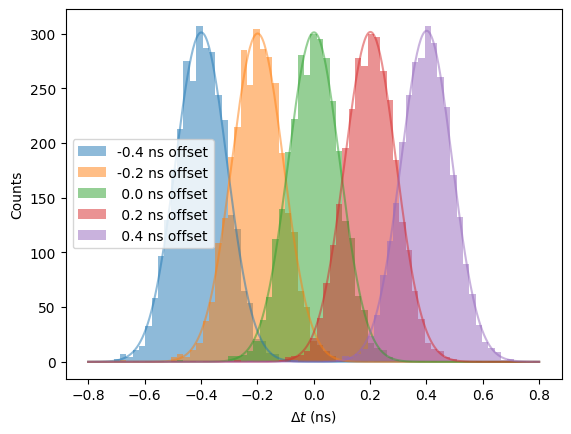

In [11]:
#------------------------------------------- Histogram and gaussian fit -----------------------------------------------
centroid_V00, sigmaN_V00 = calculate_gaussian_center_sigma(TOF_RLED_V00[None,:], np.zeros((TOF_RLED_V00.shape[0])), nbins = nbins) 

plot_gaussian(TOF_RLED_V04, centroid_V00, range = 0.8, label = '-0.4 ns offset', nbins = nbins)
plot_gaussian(TOF_RLED_V02, centroid_V00, range = 0.8, label = '-0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_RLED_V00, centroid_V00, range = 0.8, label = ' 0.0 ns offset', nbins = nbins)
plot_gaussian(TOF_RLED_V20, centroid_V00, range = 0.8, label = ' 0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_RLED_V40, centroid_V00, range = 0.8, label = ' 0.4 ns offset', nbins = nbins)


params_V04, errors_V04 = get_gaussian_params(TOF_RLED_V04, centroid_V00, range = 0.8, nbins = nbins)
params_V02, errors_V02 = get_gaussian_params(TOF_RLED_V02, centroid_V00, range = 0.8, nbins = nbins)
params_V00, errors_V00 = get_gaussian_params(TOF_RLED_V00, centroid_V00, range = 0.8, nbins = nbins)
params_V20, errors_V20 = get_gaussian_params(TOF_RLED_V20, centroid_V00, range = 0.8, nbins = nbins)
params_V40, errors_V40 = get_gaussian_params(TOF_RLED_V40, centroid_V00, range = 0.8, nbins = nbins)


print("V40: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V40[2], errors_V40[2], params_V40[3], errors_V40[3]))
print("V20: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V20[2], errors_V20[2], params_V20[3], errors_V20[3]))
print("V00: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V00[2], errors_V00[2], params_V00[3], errors_V00[3]))
print("V02: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V02[2], errors_V02[2], params_V02[3], errors_V02[3]))
print("V04: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V04[2], errors_V04[2], params_V04[3], errors_V04[3]))

print('')
plt.legend()
plt.xlabel('$\Delta t$ (ns)')
plt.ylabel('Counts')
plt.show()

In [12]:
# -------------------------------------------------------------------------
#--------------------------- BOOTSTRAPING ---------------------------------
# -------------------------------------------------------------------------

resolution_list = []
bias_list = []
MAE_list = []
for i in range(1000):
    a = np.random.choice(np.arange(0, TOF_RLED_V00.shape[0]), size = TOF_RLED_V00.shape[0], replace = True)
    
    centroid_V00, sigmaN_V00 = calculate_gaussian_center_sigma(TOF_RLED_V00[None,a], np.zeros((TOF_RLED_V00[a].shape[0])), nbins = nbins) 
    params_V04, errors_V04 = get_gaussian_params(TOF_RLED_V04[a], centroid_V00, range = 0.8, nbins = nbins)
    params_V02, errors_V02 = get_gaussian_params(TOF_RLED_V02[a], centroid_V00, range = 0.8, nbins = nbins)
    params_V00, errors_V00 = get_gaussian_params(TOF_RLED_V00[a], centroid_V00, range = 0.8, nbins = nbins)
    params_V20, errors_V20 = get_gaussian_params(TOF_RLED_V20[a], centroid_V00, range = 0.8, nbins = nbins)
    params_V40, errors_V40 = get_gaussian_params(TOF_RLED_V40[a], centroid_V00, range = 0.8, nbins = nbins)
    
    resolution = np.mean((params_V40[3], params_V20[3], params_V00[3], params_V02[3], params_V04[3]))
    resolution_list.append(resolution)
    
    bias = np.mean((params_V40[2], params_V20[2], params_V00[2], params_V02[2], params_V04[2]))
    bias_list.append(bias)

    error_V02 = abs((TOF_RLED_V02 - centroid_V00[:, np.newaxis] + time_step*t_shift))
    error_V00 = abs((TOF_RLED_V00 - centroid_V00[:, np.newaxis]))
    error_V20 = abs((TOF_RLED_V20 - centroid_V00[:, np.newaxis] - time_step*t_shift))
    error_V04 = abs((TOF_RLED_V04 - centroid_V00[:, np.newaxis] + 2*time_step*t_shift))
    error_V40 = abs((TOF_RLED_V40 - centroid_V00[:, np.newaxis] - 2*time_step*t_shift))

    Error = np.concatenate((error_V02, error_V00, error_V20, error_V04, error_V40), axis = 1)   
    MAE_list.append(np.mean(Error)) 

print('Mean CTR: ', np.mean(np.array(resolution_list))*1000)
print('Std CTR: ', np.std(np.array(resolution_list))*1000)
print('Mean bias: ', np.mean(np.array(bias_list))*1000)
print('Std bias: ', np.std(np.array(bias_list))*1000)
print('Mean MAE: ', np.mean(np.array(MAE_list))*1000)
print('Std MAE: ', np.std(np.array(MAE_list))*1000)


Mean CTR:  214.98570139817352
Std CTR:  4.002226043404094
Mean bias:  0.1825993309439926
Std bias:  1.4030148714930932
Mean MAE:  82.21922455731593
Std MAE:  0.03615012083737869


# **D-LED**

In [13]:
DATA_00 = non_normalized_data 
DATA_02 = create_position(DATA_00, channel_to_move = 1, channel_to_fix = 0, t_shift = t_shift)
DATA_20 = create_position(DATA_00, channel_to_move = 0, channel_to_fix = 1, t_shift = t_shift)
DATA_04 = create_position(DATA_00, channel_to_move = 1, channel_to_fix = 0, t_shift = int(2*t_shift))
DATA_40 = create_position(DATA_00, channel_to_move = 0, channel_to_fix = 1, t_shift = int(2*t_shift))


In [14]:
timestamps_DLED_dec0_DATA_00_list = []
timestamps_DLED_dec0_DATA_02_list = []
timestamps_DLED_dec0_DATA_20_list = []
timestamps_DLED_dec0_DATA_04_list = []
timestamps_DLED_dec0_DATA_40_list = []

timestamps_DLED_dec1_DATA_00_list = []
timestamps_DLED_dec1_DATA_02_list = []
timestamps_DLED_dec1_DATA_20_list = []
timestamps_DLED_dec1_DATA_04_list = []
timestamps_DLED_dec1_DATA_40_list = []


for i in range(DATA_00.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_00[i,:,0], time_step, threshold = threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_00[i,:,1], time_step, threshold = threshold)
  timestamps_DLED_dec0_DATA_00_list.append(timestamp_dec0)
  timestamps_DLED_dec1_DATA_00_list.append(timestamp_dec1)

for i in range(DATA_02.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_02[i,:,0], time_step, threshold = threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_02[i,:,1], time_step, threshold = threshold)
  timestamps_DLED_dec0_DATA_02_list.append(timestamp_dec0)
  timestamps_DLED_dec1_DATA_02_list.append(timestamp_dec1)

for i in range(DATA_20.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_20[i,:,0], time_step, threshold = threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_20[i,:,1], time_step, threshold = threshold)
  timestamps_DLED_dec0_DATA_20_list.append(timestamp_dec0)
  timestamps_DLED_dec1_DATA_20_list.append(timestamp_dec1)

for i in range(DATA_04.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_04[i,:,0], time_step, threshold = threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_04[i,:,1], time_step, threshold = threshold)
  timestamps_DLED_dec0_DATA_04_list.append(timestamp_dec0)
  timestamps_DLED_dec1_DATA_04_list.append(timestamp_dec1)

for i in range(DATA_40.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_40[i,:,0], time_step, threshold = threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_40[i,:,1], time_step, threshold = threshold)
  timestamps_DLED_dec0_DATA_40_list.append(timestamp_dec0)
  timestamps_DLED_dec1_DATA_40_list.append(timestamp_dec1)

timestamps_DLED_dec0_DATA_00 = np.array(timestamps_DLED_dec0_DATA_00_list)
timestamps_DLED_dec0_DATA_02 = np.array(timestamps_DLED_dec0_DATA_02_list)
timestamps_DLED_dec0_DATA_20 = np.array(timestamps_DLED_dec0_DATA_20_list)
timestamps_DLED_dec0_DATA_04 = np.array(timestamps_DLED_dec0_DATA_04_list)
timestamps_DLED_dec0_DATA_40 = np.array(timestamps_DLED_dec0_DATA_40_list)

timestamps_DLED_dec1_DATA_00 = np.array(timestamps_DLED_dec1_DATA_00_list)
timestamps_DLED_dec1_DATA_02 = np.array(timestamps_DLED_dec1_DATA_02_list)
timestamps_DLED_dec1_DATA_20 = np.array(timestamps_DLED_dec1_DATA_20_list)
timestamps_DLED_dec1_DATA_04 = np.array(timestamps_DLED_dec1_DATA_04_list)
timestamps_DLED_dec1_DATA_40 = np.array(timestamps_DLED_dec1_DATA_40_list)

# %%
TOF_DLED_V00 = timestamps_DLED_dec0_DATA_00 - timestamps_DLED_dec1_DATA_00
TOF_DLED_V02 = timestamps_DLED_dec0_DATA_02 - timestamps_DLED_dec1_DATA_02
TOF_DLED_V20 = timestamps_DLED_dec0_DATA_20 - timestamps_DLED_dec1_DATA_20
TOF_DLED_V04 = timestamps_DLED_dec0_DATA_04 - timestamps_DLED_dec1_DATA_04
TOF_DLED_V40 = timestamps_DLED_dec0_DATA_40 - timestamps_DLED_dec1_DATA_40

V40: CENTROID(ns) = 0.3955 +/- 0.00028  FWHM(ns) = 0.2203 +/- 0.00030
V20: CENTROID(ns) = 0.1955 +/- 0.00028  FWHM(ns) = 0.2201 +/- 0.00030
V00: CENTROID(ns) = -0.0044 +/- 0.00029  FWHM(ns) = 0.2202 +/- 0.00031
V02: CENTROID(ns) = -0.2043 +/- 0.00036  FWHM(ns) = 0.2199 +/- 0.00039
V04: CENTROID(ns) = -0.4044 +/- 0.00035  FWHM(ns) = 0.2195 +/- 0.00038



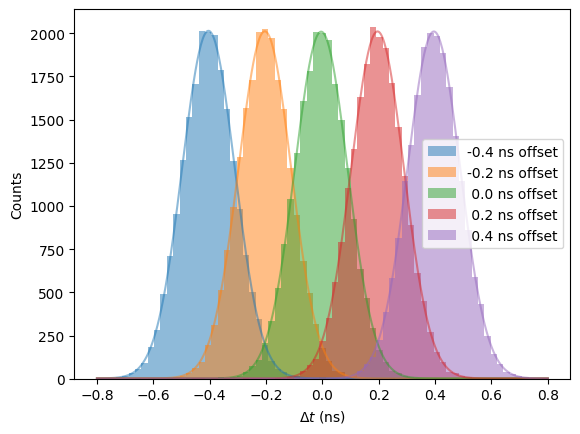

In [15]:
#------------------------------------------- Histogram and gaussian fit -----------------------------------------------
centroid_V00, sigmaN_V00 = calculate_gaussian_center_sigma(TOF_DLED_V00[None,:], np.zeros((TOF_DLED_V00.shape[0])), nbins = nbins) 

plot_gaussian(TOF_DLED_V04, centroid_V00, range = 0.8, label = '-0.4 ns offset', nbins = nbins)
plot_gaussian(TOF_DLED_V02, centroid_V00, range = 0.8, label = '-0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_DLED_V00, centroid_V00, range = 0.8, label = ' 0.0 ns offset', nbins = nbins)
plot_gaussian(TOF_DLED_V20, centroid_V00, range = 0.8, label = ' 0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_DLED_V40, centroid_V00, range = 0.8, label = ' 0.4 ns offset', nbins = nbins)


params_V04, errors_V04 = get_gaussian_params(TOF_DLED_V04, centroid_V00, range = 0.8, nbins = nbins)
params_V02, errors_V02 = get_gaussian_params(TOF_DLED_V02, centroid_V00, range = 0.8, nbins = nbins)
params_V00, errors_V00 = get_gaussian_params(TOF_DLED_V00, centroid_V00, range = 0.8, nbins = nbins)
params_V20, errors_V20 = get_gaussian_params(TOF_DLED_V20, centroid_V00, range = 0.8, nbins = nbins)
params_V40, errors_V40 = get_gaussian_params(TOF_DLED_V40, centroid_V00, range = 0.8, nbins = nbins)


print("V40: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V40[2], errors_V40[2], params_V40[3], errors_V40[3]))
print("V20: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V20[2], errors_V20[2], params_V20[3], errors_V20[3]))
print("V00: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V00[2], errors_V00[2], params_V00[3], errors_V00[3]))
print("V02: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V02[2], errors_V02[2], params_V02[3], errors_V02[3]))
print("V04: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V04[2], errors_V04[2], params_V04[3], errors_V04[3]))

print('')
plt.legend()
plt.xlabel('$\Delta t$ (ns)')
plt.ylabel('Counts')
plt.show()

In [16]:
# -------------------------------------------------------------------------
#--------------------------- BOOTSTRAPING ---------------------------------
# -------------------------------------------------------------------------

resolution_list = []
bias_list = []
MAE_list = []
for i in range(1000):
    a = np.random.choice(np.arange(0, TOF_DLED_V00.shape[0]), size = TOF_DLED_V00.shape[0], replace = True)
    
    centroid_V00, sigmaN_V00 = calculate_gaussian_center_sigma(TOF_DLED_V00[None,a], np.zeros((TOF_DLED_V00[a].shape[0])), nbins = nbins) 
    params_V04, errors_V04 = get_gaussian_params(TOF_DLED_V04[a], centroid_V00, range = 0.8, nbins = nbins)
    params_V02, errors_V02 = get_gaussian_params(TOF_DLED_V02[a], centroid_V00, range = 0.8, nbins = nbins)
    params_V00, errors_V00 = get_gaussian_params(TOF_DLED_V00[a], centroid_V00, range = 0.8, nbins = nbins)
    params_V20, errors_V20 = get_gaussian_params(TOF_DLED_V20[a], centroid_V00, range = 0.8, nbins = nbins)
    params_V40, errors_V40 = get_gaussian_params(TOF_DLED_V40[a], centroid_V00, range = 0.8, nbins = nbins)
    
    resolution = np.mean((params_V40[3], params_V20[3], params_V00[3], params_V02[3], params_V04[3]))
    resolution_list.append(resolution)
    
    bias = np.mean((params_V40[2], params_V20[2], params_V00[2], params_V02[2], params_V04[2]))
    bias_list.append(bias)

    error_V02 = abs((TOF_DLED_V02 - centroid_V00[:, np.newaxis] + time_step*t_shift))
    error_V00 = abs((TOF_DLED_V00 - centroid_V00[:, np.newaxis]))
    error_V20 = abs((TOF_DLED_V20 - centroid_V00[:, np.newaxis] - time_step*t_shift))
    error_V04 = abs((TOF_DLED_V04 - centroid_V00[:, np.newaxis] + 2*time_step*t_shift))
    error_V40 = abs((TOF_DLED_V40 - centroid_V00[:, np.newaxis] - 2*time_step*t_shift))

    Error = np.concatenate((error_V02, error_V00, error_V20, error_V04, error_V40), axis = 1)   
    MAE_list.append(np.mean(Error)) 

print('Mean CTR: ', np.mean(np.array(resolution_list))*1000)
print('Std CTR: ', np.std(np.array(resolution_list))*1000)
print('Mean bias: ', np.mean(np.array(bias_list))*1000)
print('Std bias: ', np.std(np.array(bias_list))*1000)
print('Mean MAE: ', np.mean(np.array(MAE_list))*1000)
print('Std MAE: ', np.std(np.array(MAE_list))*1000)

Mean CTR:  219.9105244843933
Std CTR:  1.8056142317301895
Mean bias:  -1.8939440167754542
Std bias:  2.3167765030525413
Mean MAE:  84.56062939752229
Std MAE:  0.03778530082376328


# **ML**